In [0]:
import numpy as np
import pandas as pd
import seaborn as stats
from sklearn.tree import DecisionTreeClassifier

In [0]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/Balance.csv')

In [4]:
data.head()

,Unnamed: 0,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,0,B,1,1,1,1
1,1,R,1,1,1,2
2,2,R,1,1,1,3
3,3,R,1,1,1,4
4,4,R,1,1,1,5


In [5]:
data.tail()

,Unnamed: 0,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
620,620,L,5,5,5,1
621,621,L,5,5,5,2
622,622,L,5,5,5,3
623,623,L,5,5,5,4
624,624,B,5,5,5,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      625 non-null    int64 
 1   Class Name      625 non-null    object
 2   Left-Weight     625 non-null    int64 
 3   Left-Distance   625 non-null    int64 
 4   Right-Weight    625 non-null    int64 
 5   Right-Distance  625 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 29.4+ KB


In [8]:
data.describe()

,Unnamed: 0,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,625.000000,625.000000,625.000000,625.000000,625.000000
mean,312.000000,3.000000,3.000000,3.000000,3.000000
std,180.566239,1.415346,1.415346,1.415346,1.415346
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,156.000000,2.000000,2.000000,2.000000,2.000000
50%,312.000000,3.000000,3.000000,3.000000,3.000000
75%,468.000000,4.000000,4.000000,4.000000,4.000000
max,624.000000,5.000000,5.000000,5.000000,5.000000


In [0]:
data1=data.drop(['Unnamed: 0'],axis=1)

In [10]:
data1.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [11]:
data1.head(244)

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
239,R,2,5,3,5
240,L,2,5,4,1
241,L,2,5,4,2
242,R,2,5,4,3


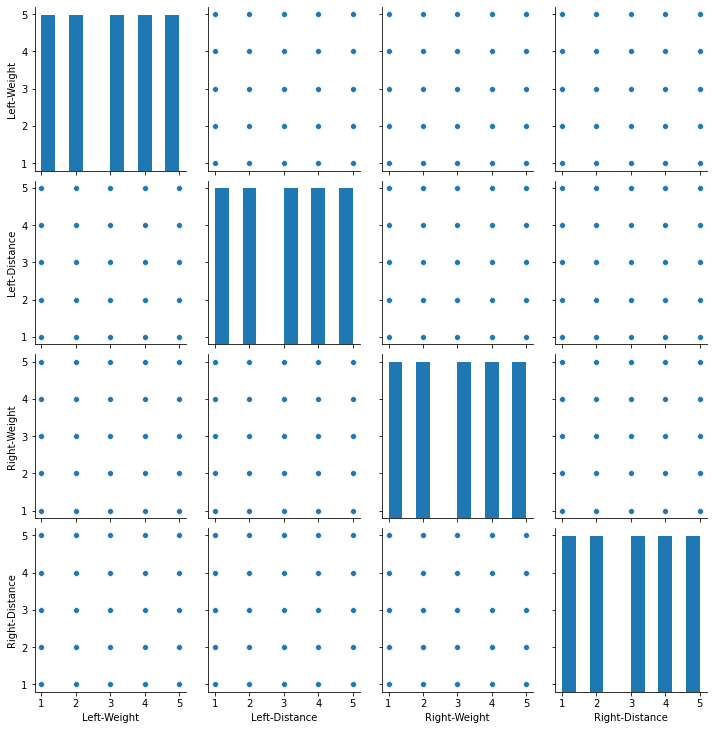

In [24]:
import seaborn as sns
sns.pairplot(data1)

In [12]:
data1.columns

Index(['Class Name', 'Left-Weight', 'Left-Distance', 'Right-Weight',
       'Right-Distance'],
      dtype='object')

In [0]:
x=data1[['Left-Weight', 'Left-Distance', 'Right-Weight',
       'Right-Distance']].values

In [0]:
y=data1['Class Name']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_traine,y_test=train_test_split(x,y,test_size=0.15,random_state=3)

In [124]:
x_train.shape

(531, 4)

In [125]:
y_traine.shape

(531,)

In [126]:
x_test.shape

(94, 4)

In [127]:
y_test.shape

(94,)

In [128]:
balancetree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
balancetree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [129]:
balancetree.fit(x_train,y_traine)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [130]:
balancetree.score(x_train,y_traine)

0.775894538606403

In [131]:
balancetree.score(x_test,y_test)

0.723404255319149

In [133]:
predtree=balancetree.predict(x_test)
predtree

array(['R', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'L',
       'R', 'L', 'R', 'L', 'R', 'L', 'R', 'B', 'L', 'R', 'R', 'B', 'R',
       'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'L', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'R',
       'L', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'R', 'B', 'R', 'R', 'R', 'R', 'R', 'L',
       'L', 'R', 'L'], dtype=object)

In [134]:
pd.DataFrame({"actual Data":y_test,"New_predit":predtree})

,actual Data,New_predit
247,R,R
291,R,L
360,L,L
142,R,R
254,R,R
...,...,...
67,R,R
409,R,L
527,L,L
111,R,R


In [135]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecissionTree accuracy",metrics.accuracy_score(y_test,predtree))

DecissionTree accuracy 0.723404255319149


In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [0]:
data1=confusion_matrix(y_test,predtree)

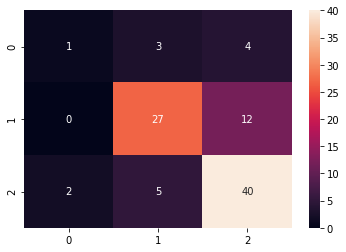

In [138]:
import seaborn as sns
sns.heatmap(data1,annot=True)

In [139]:
print(classification_report(y_test,predtree))

              precision    recall  f1-score   support

           B       0.33      0.12      0.18         8
           L       0.77      0.69      0.73        39
           R       0.71      0.85      0.78        47

    accuracy                           0.72        94
   macro avg       0.61      0.56      0.56        94
weighted avg       0.71      0.72      0.71        94

